# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [3]:
df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Lets drop unwanted columns

df.drop(['instant'],axis=1,inplace=True)
df.drop(['dteday'],axis=1,inplace=True)
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)

df



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


In [9]:
df.shape

(730, 12)

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
df.mnth = df.mnth.map({1:'Jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [12]:
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,sat,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,sun,0,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,mon,1,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,tue,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,wed,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


# Checking the Outliers in some Variables

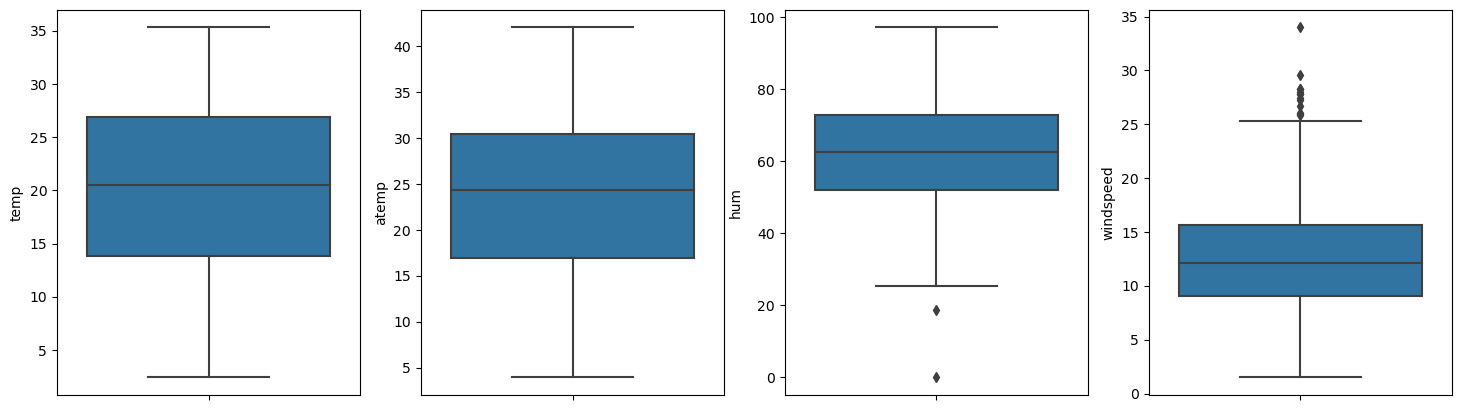

In [13]:
cols = ['temp','atemp','hum','windspeed']
plt.figure(figsize=(18,5))
a=1
for i in cols:
    plt.subplot(1,4,a)
    sns.boxplot(y=i,data=df)
    a=a+1

- NO OUTLIERS

# Data Visualisation

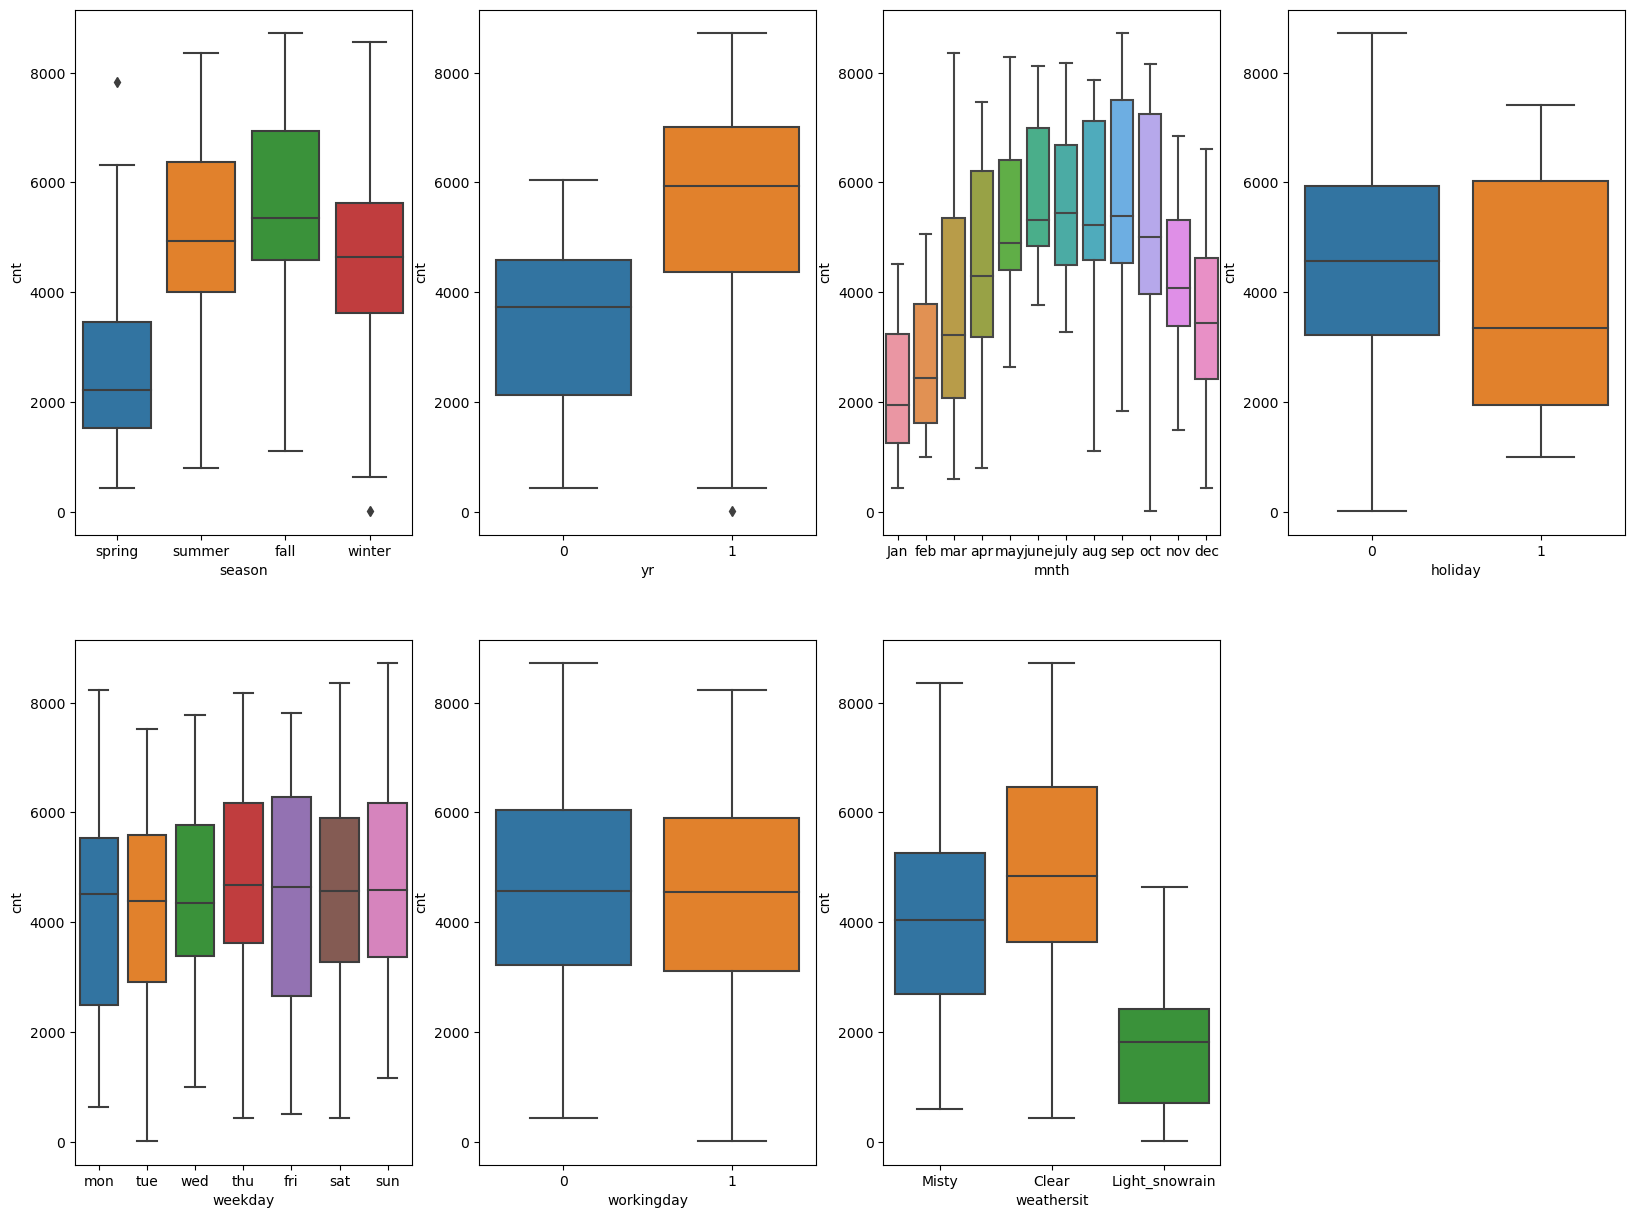

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
sns.boxplot(x='season', y = 'cnt',data=df)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y = 'cnt',data=df)
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y = 'cnt',data=df)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y = 'cnt',data=df)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y = 'cnt',data=df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y = 'cnt',data=df)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y = 'cnt',data=df)
plt.show()

1."fall" season has the highest demand for rental bikes

2.Demand increases with each passing year.

3.Demand grows continuously till the "June" month. "September" has the highest demand. Beyond "September", demand shows a decreasing trend.

4.During holidays, the demands are decreasing.

5.The clear weather has the highest demand.

6.During September, the demand is high.

# Linear Regression Model Preparation

In [15]:
# Lets create the dummy variables for all the Categorical variables...

In [16]:
mnth_df = pd.get_dummies(df.mnth,drop_first=True)
mnth_df

,apr,aug,dec,feb,july,june,mar,may,nov,oct,sep
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
725,False,False,True,False,False,False,False,False,False,False,False
726,False,False,True,False,False,False,False,False,False,False,False
727,False,False,True,False,False,False,False,False,False,False,False
728,False,False,True,False,False,False,False,False,False,False,False


In [17]:
mnth_df = mnth_df.astype(int)
mnth_df

,apr,aug,dec,feb,july,june,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,1,0,0,0,0,0,0,0,0
726,0,0,1,0,0,0,0,0,0,0,0
727,0,0,1,0,0,0,0,0,0,0,0
728,0,0,1,0,0,0,0,0,0,0,0


In [18]:
season_df = pd.get_dummies(df.season, drop_first = True)
season_df 

,spring,summer,winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
725,True,False,False
726,True,False,False
727,True,False,False
728,True,False,False


In [19]:
season_df = season_df.astype(int)
season_df

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [20]:
weekday_df = pd.get_dummies(df.weekday, drop_first=True)
weekday_df = weekday_df.astype(int)
weekday_df

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


In [21]:
weathersit_df = pd.get_dummies(df.weathersit, drop_first = True)
weathersit_df = weathersit_df.astype(int)
weathersit_df

,Light_snowrain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [22]:
df1 = pd.concat([df,mnth_df,season_df,weekday_df,weathersit_df], axis =1 )
df1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,spring,0,Jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,Misty,10.420847,11.33210,65.2917,...,0,0,0,0,0,0,0,0,0,1
726,spring,1,dec,0,sat,0,Misty,10.386653,12.75230,59.0000,...,0,0,0,1,0,0,0,0,0,1
727,spring,1,dec,0,sun,0,Misty,10.386653,12.12000,75.2917,...,0,0,0,0,1,0,0,0,0,1
728,spring,1,dec,0,mon,1,Clear,10.489153,11.58500,48.3333,...,0,0,1,0,0,0,0,0,0,0


In [23]:
pd.set_option('display.max_columns',None)
df1.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,apr,aug,dec,feb,july,june,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,spring,0,Jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
df1.shape

(730, 34)

In [25]:
# Lets drop the unnecssary columns

In [26]:
df1.drop(['season','mnth','weekday','weathersit'], axis =1 , inplace = True)
df1

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,apr,aug,dec,feb,july,june,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   apr             730 non-null    int32  
 9   aug             730 non-null    int32  
 10  dec             730 non-null    int32  
 11  feb             730 non-null    int32  
 12  july            730 non-null    int32  
 13  june            730 non-null    int32  
 14  mar             730 non-null    int32  
 15  may             730 non-null    int32  
 16  nov             730 non-null    int32  
 17  oct             730 non-null    int

Since we can see all our columns have numerical values now, lets proceed and separate the train and test dataset.

In [28]:
# Splitting the data into train and test

np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, random_state = 100)


In [29]:
df_train.shape

(510, 30)

In [30]:
df_test.shape

(220, 30)

In [31]:
num_vars = df_train[['temp','atemp','hum','windspeed','cnt']]
num_vars.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,20.108257,23.500287,63.123710,12.834912,4485.337255
std,7.431626,8.090963,14.153170,5.292031,1950.666077
min,2.424346,3.953480,0.000000,2.834381,22.000000
25%,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,20.277923,24.131150,63.437500,12.083182,4530.000000
75%,26.615847,30.177700,73.250025,15.750879,5973.500000
90%,29.762572,33.718990,81.537500,19.863597,7264.900000
95%,31.315460,35.216960,86.633330,23.130018,7561.100000
99%,33.660999,37.627060,92.439997,27.405952,8117.300000


Lets now use the MinMAxScaler to scale the variables from train dataset which consists high Numerical Values

In [32]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,apr,aug,dec,feb,july,june,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [33]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,sat,0,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sun,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,mon,1,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [34]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,apr,aug,dec,feb,july,june,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.078431,0.096078,0.084314,0.066667,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.243137,0.247059,0.247059,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.269113,0.294988,0.278131,0.249689,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.429398,0.431725,0.431725,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Lets check the corelation coefficients to see which variables are highly co-related...

In [36]:
df_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,apr,aug,dec,feb,july,june,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
yr,1.000000,-0.014980,-0.003005,0.108054,0.104971,-0.084061,-0.000439,0.591433,0.053776,0.054774,-0.040049,-1.991603e-02,0.017623,0.017623,-0.005172,-0.025933,-0.018790,-0.025933,0.002574,-0.036320,0.018294,-0.027174,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,-6.076399e-02,-0.011388
holiday,-0.014980,1.000000,-0.254149,-0.066405,-0.070760,-0.029224,0.017458,-0.095948,-0.000907,-0.052728,-0.004302,5.652428e-02,-0.046539,-0.046539,-0.053321,-0.049076,0.127543,-0.004302,0.043692,0.053339,-0.063798,0.051582,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-2.815377e-02,-0.038895
workingday,-0.003005,-0.254149,1.000000,-0.007143,0.004316,0.021192,-0.002071,-0.009071,0.008525,-0.012875,-0.025020,-3.470925e-03,-0.012361,0.036508,-0.008563,0.021720,0.025939,0.021720,-0.034746,-0.032886,0.033299,0.033299,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,8.289412e-03,-0.066206
temp,0.108054,-0.066405,-0.007143,1.000000,0.989539,0.155252,-0.187281,0.645048,-0.050823,0.387176,-0.273091,-2.962130e-01,0.413678,0.301219,-0.179941,0.155168,-0.194994,-0.018286,0.207212,-0.606396,0.126057,-0.234200,-0.038042,0.024972,0.006540,0.074647,-0.002284,-0.044303,-3.622709e-02,-0.089452
atemp,0.104971,-0.070760,0.004316,0.989539,1.000000,0.169341,-0.215108,0.647944,-0.040464,0.359727,-0.262072,-2.996857e-01,0.406832,0.293970,-0.178698,0.161665,-0.185918,-0.005162,0.205900,-0.611118,0.136550,-0.211852,-0.037163,0.011785,0.006044,0.078295,0.002480,-0.041378,-4.439780e-02,-0.085086
hum,-0.084061,-0.029224,0.021192,0.155252,0.169341,1.000000,-0.267126,-0.058793,-0.133153,0.052949,0.057615,-1.297797e-01,-0.054070,-0.095077,-0.111040,0.145409,0.004676,0.167153,0.152439,-0.201616,-0.014192,0.173980,-0.030833,0.002489,-0.027699,-0.057323,0.033232,0.028329,2.449653e-01,0.479436
windspeed,-0.000439,0.017458,-0.002071,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,0.183324,-0.111460,-0.061179,1.329361e-01,-0.085671,-0.033103,0.141944,-0.034342,0.009742,-0.018546,-0.121930,0.180351,0.110441,-0.090740,0.035097,-0.016545,0.018007,-0.021779,0.035326,-0.055798,8.677832e-02,-0.029892
cnt,0.591433,-0.095948,-0.009071,0.645048,0.647944,-0.058793,-0.253038,1.000000,0.023172,0.227578,-0.143546,-2.703505e-01,0.158087,0.195411,-0.137465,0.113276,-0.048002,0.055558,0.201639,-0.548987,0.140259,0.025945,-0.071013,0.012712,0.031474,0.110734,-0.018672,-0.020949,-2.266784e-01,-0.169715
apr,0.053776,-0.000907,0.008525,-0.050823,-0.040464,-0.133153,0.183324,0.023172,1.000000,-0.095111,-0.088523,-7.796812e-02,-0.083947,-0.083947,-0.096181,-0.088523,-0.089643,-0.088523,-0.086255,-0.165348,0.509286,-0.167109,0.016205,-0.003834,-0.010389,0.026542,0.017879,-0.008780,-7.617551e-03,-0.012333
aug,0.054774,-0.052728,-0.012875,0.387176,0.359727,0.052949,-0.111460,0.227578,-0.095111,1.000000,-0.098929,-8.713318e-02,-0.093814,-0.093814,-0.107486,-0.098929,-0.100180,-0.098929,-0.096395,-0.184784,-0.186753,-0.186753,0.007536,0.032882,0.005308,0.018738,-0.064591,0.007209,-5.675323e-02,0.015258


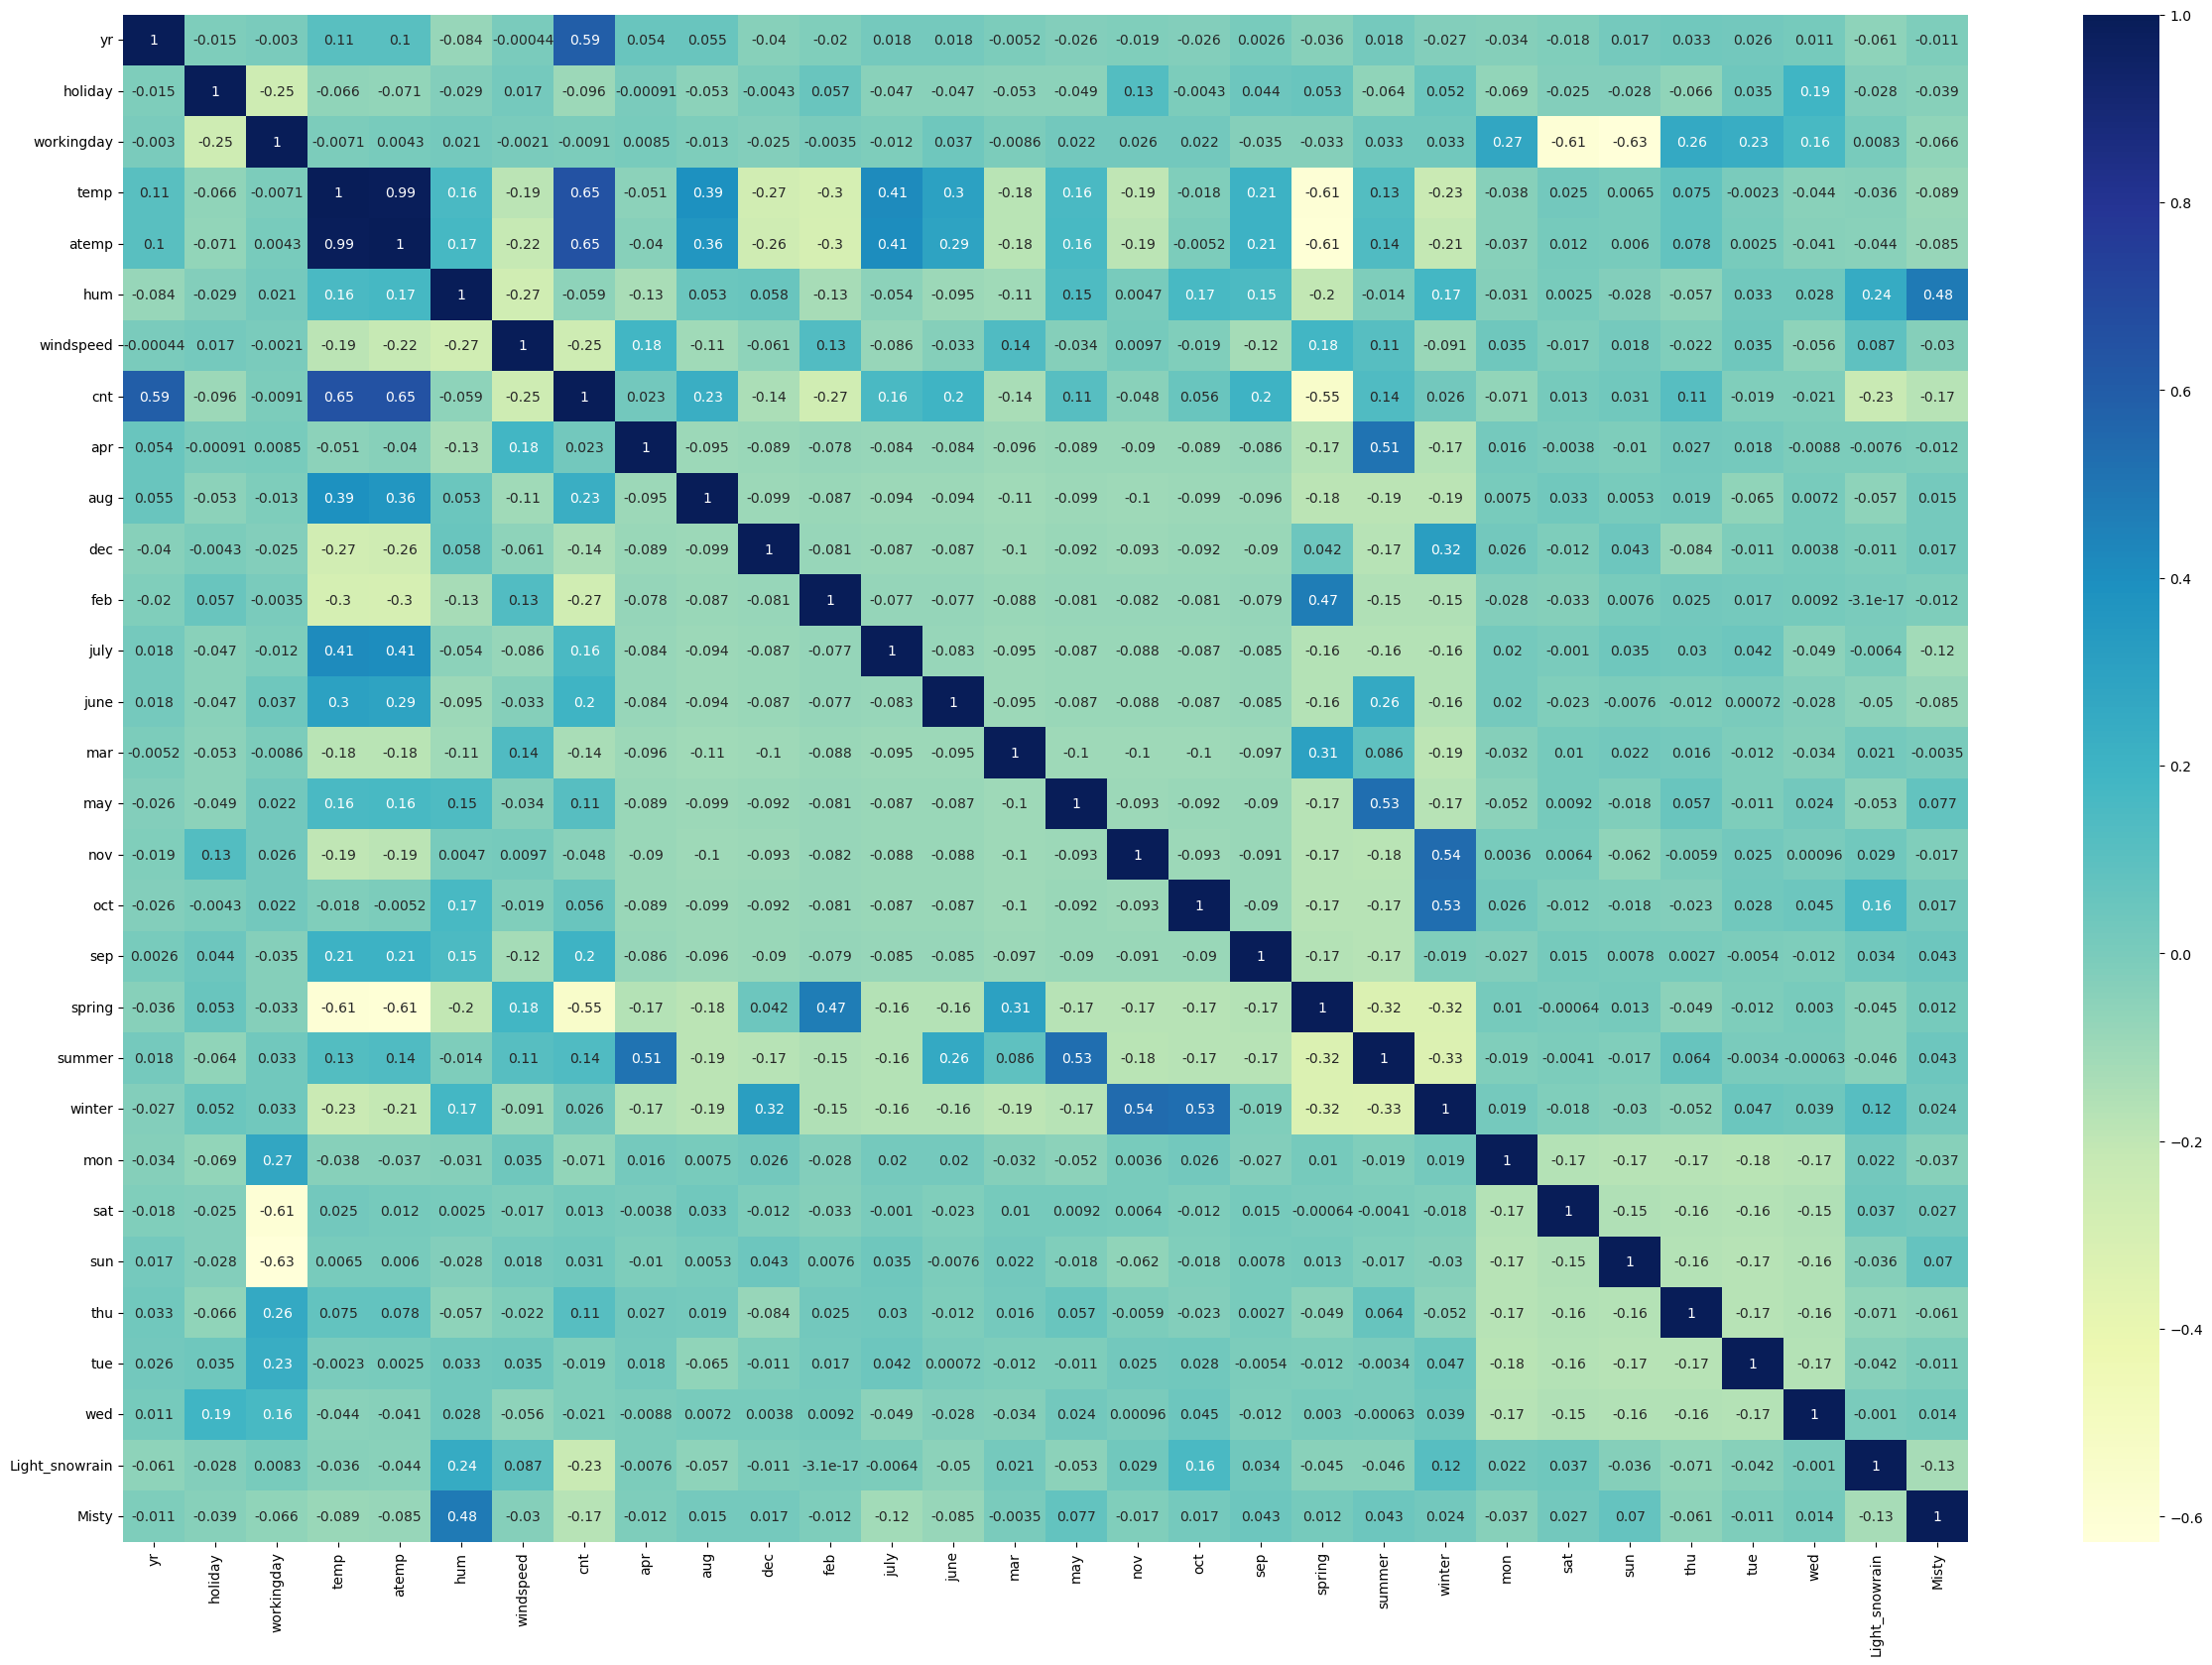

In [37]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

yr and temp/atemp has max corelation with cnt ( target variable )

Lets see the trend of cnt with temp using scatter plot

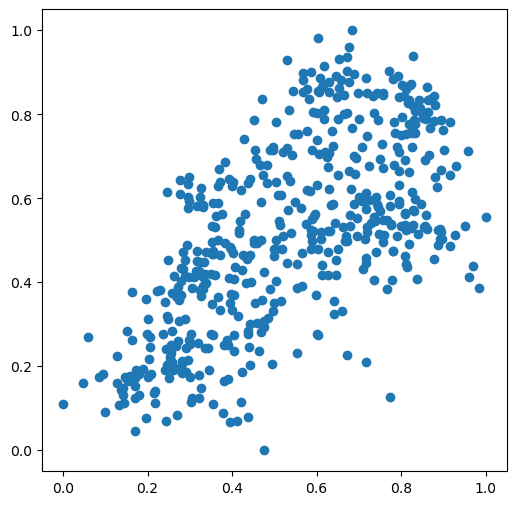

In [38]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp,df_train.cnt)
plt.show()

Dividing the training data into X and y train 

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

# Building the linear model

In [40]:
# Using RFE (Recursive feature elemination) for automated feature(variable) elimination.

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('apr', False, 8),
 ('aug', True, 1),
 ('dec', False, 18),
 ('feb', False, 15),
 ('july', False, 16),
 ('june', False, 7),
 ('mar', False, 5),
 ('may', False, 6),
 ('nov', False, 17),
 ('oct', False, 3),
 ('sep', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 14),
 ('sat', False, 11),
 ('sun', False, 12),
 ('thu', False, 20),
 ('tue', False, 13),
 ('wed', False, 19),
 ('Light_snowrain', True, 1),
 ('Misty', False, 2)]

In [43]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'aug', 'sep', 'summer',
       'winter', 'Light_snowrain'],
      dtype='object')


In [44]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'apr', 'dec', 'feb', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'spring', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Misty'],
      dtype='object')

# Building Model for detailed statistics

In [45]:
X_train[col]

,yr,holiday,temp,hum,windspeed,aug,sep,summer,winter,Light_snowrain
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,1,0,0
111,0,0,0.345824,0.751824,0.380981,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,1,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,0,1,0
79,0,0,0.462664,0.759870,0.529881,0,0,1,0,0


In [46]:
# since the above dataframe is for the variables selected automatically with RFE..
# Lets name this dataframe as X_train_rfe

In [47]:
X_train_rfe = X_train[col]

In [48]:
X_train_rfe

,yr,holiday,temp,hum,windspeed,aug,sep,summer,winter,Light_snowrain
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,1,0,0
111,0,0,0.345824,0.751824,0.380981,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,1,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,0,1,0
79,0,0,0.462664,0.759870,0.529881,0,0,1,0,0


In [49]:
# lets now build the model....here we use statsdmodel
# Now, we need to add a constant bcoz Statsmodel doesnt have a constant

In [50]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()


In [51]:
lm

In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          1.02e-186
Time:                        20:34:02   Log-Likelihood:                 495.21
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     499   BIC:                            -921.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2755      0.026     10.

In [53]:
X_train_rfe

,const,yr,holiday,temp,hum,windspeed,aug,sep,summer,winter,Light_snowrain
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,1,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.679690,0.187140,1,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,0,0,1,0
79,1.0,0,0,0.462664,0.759870,0.529881,0,0,1,0,0


# Calculation of VIF

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif
                                                                          

,Features,VIF
3,temp,444.69
4,atemp,382.13
2,workingday,59.90
5,hum,39.97
18,spring,12.33
20,winter,12.13
23,sun,11.54
22,sat,11.12
8,aug,10.52
19,summer,10.46
